In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from itertools import chain
from datetime import datetime

# Loading data and exploring

In [ ]:
# Load the data
df = pd.read_excel(r'C:\Users\Hp\Downloads\Halimat Thanni - capstone.xlsx', sheet_name="Halimat Thanni - capstone")

In [ ]:
# Display the first 5 rows
df.head()

,show_id,Type,title,director,Country,date added,rating,duration,listed_in
0,s1,Movie,DICK jOHNSON IS deAD,Kirsten Johnson,United States,2021-09-25 00:00:00,PG-13,90 min,Documentaries
1,s3,TV Show,GANGLANdS,Julien Leclercq,France,(9/24/2021),TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,MIDNIgHT MASS,Mike Flanagan,United States,(9/24/2021),TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,COnfESsIoNs OF AN INVISIBLE GIRL,Bruno Garotti,Brazil,2021-09-22 00:00:00,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,sANKOFa,Haile Gerima,Us,2021-09-24 00:00:00,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   show_id     8790 non-null   object
 1   Type        8790 non-null   object
 2   title       8790 non-null   object
 3   director    8790 non-null   object
 4   Country     8790 non-null   object
 5   date added  8790 non-null   object
 6   rating      8790 non-null   object
 7   duration    8790 non-null   object
 8   listed_in   8790 non-null   object
dtypes: object(9)
memory usage: 618.2+ KB


# CLEANING: Standardize text column

In [ ]:
# Standardize text columns (title) to correct inconsistent capitalization
# the function below is to apply title case only to text records without truncating numeric records

def title(value):
    if isinstance(value, str) and not value.isdigit():   # Ensure it's a string and not a pure number
        return value.title()
    return value

In [ ]:
df["title"] = df["title"].apply(title)

In [ ]:
df["title"]

0                   Dick Johnson Is Dead
1                              Ganglands
2                          Midnight Mass
3       Confessions Of An Invisible Girl
4                                Sankofa
                      ...               
8785                          Yunus Emre
8786                           Zak Storm
8787                  Zindagi Gulzar Hai
8788                                Yoko
8789                                 Yom
Name: title, Length: 8790, dtype: object

# CLEANING: Standardizing Country column and taking out abbrevation and wrong spelling

In [ ]:
# Ensuring country names are unique, standardized, and not abbrevated

df["Country"].unique()

array(['United States', 'France', 'Brazil', 'Us', 'UK', 'India',
       'Germany', 'PK', 'US', 'Pakistan', 'Not Given', 'China',
       'South Africa', 'Japan', 'JP', 'Nigeria', 'Spain',
       'United Kingdom', 'Philippines', 'Australia', 'Argentina',
       'Canada', 'Hong Kong', 'Italy', 'New Zealand', 'Egypt', 'Colombia',
       'Mexico', 'Belgium', 'Switzerland', 'Argentin', 'Taiwan',
       'Bulgaria', 'Poland', 'South Korea', 'Saudi Arabia', 'Thailand',
       'Indonesia', 'Kuwait', 'Malaysia', 'australia', 'Vietnam',
       'nited States', 'Lebanon', 'Romania', 'Syria', 'united States',
       'United Arab Emirates', 'Sweden', 'Mauritius', 'Austria', 'Turkey',
       'china', 'Czech Republic', 'ID', 'Cameroon', 'Netherlands',
       'Ireland', 'Russia', 'Kenya', 'Chile', 'Uruguay', 'Bangladesh',
       'Portugal', 'Hungary', 'Norway', 'canada', 'Singapore', 'Iceland',
       'Serbia', 'Namibia', 'Peru', 'Mozambique', 'Ghana', 'thailan',
       'Zimbabwe', 'UAE', 'United states'

In [ ]:
correction1 = {
    'Us' : 'United States',
    'UK' : 'United Kingdom',
    'PK' : 'Pakistan',
    'JP' : 'Japan',
    'Argentin' : 'Argentina',
    'australia' : 'Australia',
    'china' : 'China',
    'nited States' : 'United States',
    'united States' : 'United States',
    'ID' : 'Indonesia',
    'canada' : 'Canada',
    'thailan' : 'Thailan',
    'UAE' : 'United Arab Emirates',
    'United states' : 'United States',
    'United State' : 'United States',
    'ITL' : 'Italy',
    'us' : 'United States',
    'thailand' : 'Thailand',
    'uk' : 'United Kingdom',
    'malaysia' : 'Malaysia',
    'taiwan' : 'Taiwan',
    'mexico' : 'Mexico',
    'japan' : 'Japan',
    'india' : 'India',
    'pakistan' : 'Pakistan'
}

In [ ]:
df["Country"] = df["Country"].replace(correction1)
df["Country"]

0       United States
1              France
2       United States
3              Brazil
4       United States
            ...      
8785           Turkey
8786    United States
8787         Pakistan
8788         Pakistan
8789         Pakistan
Name: Country, Length: 8790, dtype: object

# CLEANING: removing parenthesis from date column

In [ ]:
# using dictionary to correct date with parenthesis
correction = {
    '(9/24/2021)' : pd.to_datetime('2021-09-24')}

In [ ]:
df["date added"] = df["date added"].replace(correction)

# CLEANING: Changing datatype of date column to datetime

In [ ]:
# Convert 'date added' to datetime
df["date added"] = pd.to_datetime(df["date added"], errors='coerce')

# CLEANING: Standardizing Type column and removing abbrevations and wrong spelling

In [ ]:
# Ensuring Type column names are unique, standardized, and not abbrevated

df["Type"].unique()

array(['Movie', 'TV Show', 'Mvie', 'TV', 'TVS', 'Mvi', 'Mv', 'Mve', 'MvE',
       'tv', 'm', 'M'], dtype=object)

In [ ]:
correction2 = {
    'Mvie' : 'Movie',
    'TV' : 'TV Show',
    'TVS' : 'TV Show',
    'Mvi' : 'Movie',
    'Mv' : 'Movie',
    'Mve' : 'Movie',
    'MvE' : 'Movie',
    'tv' : 'TV Show',
    'm' : 'Movie',
    'M' : 'Movie'
}

In [ ]:
df["Type"] = df["Type"].replace(correction2)

# Extract year and year-month

In [ ]:
df["year_added"] = df["date added"].dt.year
df["year_month_added"] = df["date added"].dt.to_period("M")

In [ ]:
# Getting number of days from when the movie was released till today

In [ ]:
# Get today's date
today_date = pd.to_datetime(datetime.today().date())

# Calculate the difference in days
df["days_since_release"] = (today_date - df["date added"]).dt.days

# Checking the result
df[["title", "date added", "days_since_release"]].head(10)


,title,date added,days_since_release
0,Dick Johnson Is Dead,2021-09-25,1238
1,Ganglands,2021-09-24,1239
2,Midnight Mass,2021-09-24,1239
3,Confessions Of An Invisible Girl,2021-09-22,1241
4,Sankofa,2021-09-24,1239
5,The Great British Baking Show,2021-09-24,1239
6,The Starling,2021-09-24,1239
7,Motu Patlu In The Game Of Zones,2021-05-01,1385
8,Je Suis Karl,2021-09-23,1240
9,Motu Patlu In Wonderland,2021-05-01,1385


# Create a new column to store TV show duration

In [ ]:
def TV_Show_duration(df):
    df["TV_Show_duration"] = df["duration"].where(df["Type"] == "TV Show")

    # Remove TV show duration from original column
    df.loc[df["Type"] == "TV Show", "duration"] = None

    return df


In [ ]:
# Display the cleaned dataset preview
df = TV_Show_duration(df)
df.head()


,show_id,Type,title,director,Country,date added,rating,duration,listed_in,year_added,year_month_added,days_since_release,TV_Show_duration
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,PG-13,90 min,Documentaries,2021,2021-09,1238,NaN
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,TV-MA,None,"Crime TV Shows, International TV Shows, TV Act...",2021,2021-09,1239,1 Season
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,TV-MA,None,"TV Dramas, TV Horror, TV Mysteries",2021,2021-09,1239,1 Season
3,s14,Movie,Confessions Of An Invisible Girl,Bruno Garotti,Brazil,2021-09-22,TV-PG,91 min,"Children & Family Movies, Comedies",2021,2021-09,1241,NaN
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,TV-MA,125 min,"Dramas, Independent Movies, International Movies",2021,2021-09,1239,NaN


In [ ]:
df.isnull().sum()

show_id                  0
Type                     0
title                    0
director                 0
Country                  0
date added               0
rating                   0
duration              2664
listed_in                0
year_added               0
year_month_added         0
days_since_release       0
TV_Show_duration      6126
dtype: int64

# Filling up missing values

In [ ]:
df[["duration", "TV_Show_duration"]] = df[["duration", "TV_Show_duration"]].fillna("NIL")

In [ ]:
df.isnull().sum()

show_id               0
Type                  0
title                 0
director              0
Country               0
date added            0
rating                0
duration              0
listed_in             0
year_added            0
year_month_added      0
days_since_release    0
TV_Show_duration      0
dtype: int64

In [ ]:
df.head()

,show_id,Type,title,director,Country,date added,rating,duration,listed_in,year_added,year_month_added,days_since_release,TV_Show_duration
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,PG-13,90 min,Documentaries,2021,2021-09,1238,NIL
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,TV-MA,NIL,"Crime TV Shows, International TV Shows, TV Act...",2021,2021-09,1239,1 Season
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,TV-MA,NIL,"TV Dramas, TV Horror, TV Mysteries",2021,2021-09,1239,1 Season
3,s14,Movie,Confessions Of An Invisible Girl,Bruno Garotti,Brazil,2021-09-22,TV-PG,91 min,"Children & Family Movies, Comedies",2021,2021-09,1241,NIL
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,TV-MA,125 min,"Dramas, Independent Movies, International Movies",2021,2021-09,1239,NIL


In [ ]:
df.describe(include="all")

,show_id,Type,title,director,Country,date added,rating,duration,listed_in,year_added,year_month_added,days_since_release,TV_Show_duration
count,8790,8790,8790,8790,8790,8790,8790,8790,8790,8790.000000,8790,8790.000000,8790
unique,8790,2,8782,4528,90,NaN,23,232,515,NaN,108,NaN,20
top,s1,Movie,Esperando La Carroza,Not Given,United States,NaN,TV-MA,NIL,"Dramas, International Movies",NaN,2021-07,NaN,NIL
freq,1,6126,2,2588,3101,NaN,3203,2664,362,NaN,257,NaN,6126
mean,NaN,NaN,NaN,NaN,NaN,2019-05-17 21:44:01.638225408,NaN,NaN,NaN,2018.873606,NaN,2099.094425,NaN
min,NaN,NaN,NaN,NaN,NaN,2008-01-01 00:00:00,NaN,NaN,NaN,2008.000000,NaN,1238.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,2018-04-06 00:00:00,NaN,NaN,NaN,2018.000000,NaN,1639.250000,NaN
50%,NaN,NaN,NaN,NaN,NaN,2019-07-03 00:00:00,NaN,NaN,NaN,2019.000000,NaN,2053.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,2020-08-19 18:00:00,NaN,NaN,NaN,2020.000000,NaN,2506.000000,NaN
max,NaN,NaN,NaN,NaN,NaN,2021-09-25 00:00:00,NaN,NaN,NaN,2021.000000,NaN,6254.000000,NaN


# Most Popular Directors

In [ ]:
# Counting each director
director_counts = Counter(df["director"])

# Get the most common directors
director_counts.most_common(10)  # Top 10 directors


[('Not Given', 2588),
 ('Rajiv Chilaka', 20),
 ('Raúl Campos, Jan Suter', 18),
 ('Alastair Fothergill', 18),
 ('Suhas Kadav', 16),
 ('Marcus Raboy', 16),
 ('Jay Karas', 14),
 ('Cathy Garcia-Molina', 13),
 ('Youssef Chahine', 12),
 ('Martin Scorsese', 12)]

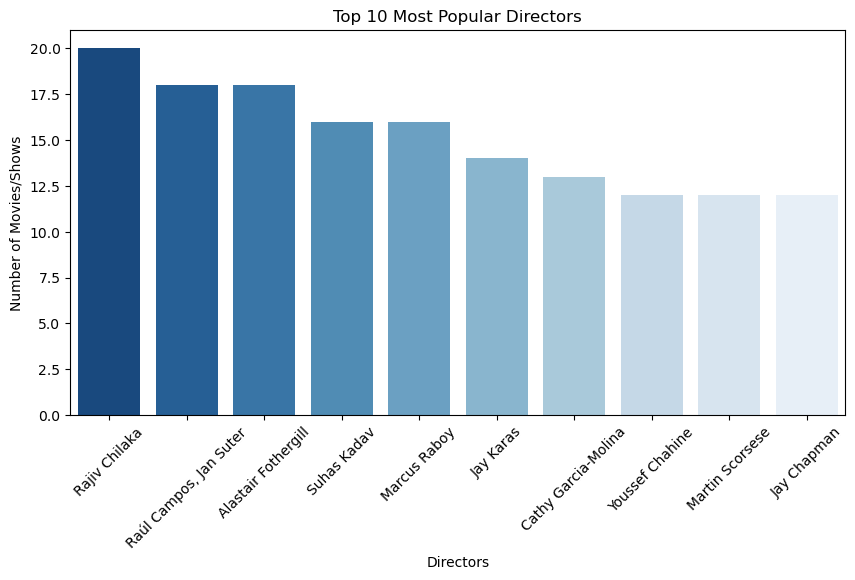

In [ ]:
# Filter out "Not Given"
directors_filtered = [d for d in director_counts.most_common(11) if d[0] != "Not Given"][:10]

# Extract names and counts
names, counts = zip(*directors_filtered)

# Plot
plt.figure(figsize=(10,5))
sns.barplot(x=list(names), y=list(counts), palette="Blues_r")
plt.xticks(rotation=45)
plt.xlabel("Directors")
plt.ylabel("Number of Movies/Shows")
plt.title("Top 10 Most Popular Directors")
plt.show()


# Top 5 & Bottom 5 Countries Producing Movies/Shows

In [ ]:
# Counting each country occurrences
country_counts = df["Country"].value_counts()

# Top 5 countries
top_5_countries = country_counts.head(5)

# Bottom 5 countries (excluding missing values)
bottom_5_countries = country_counts.tail(5)

top_5_countries, bottom_5_countries


(Country
 United States     3101
 India             1048
 United Kingdom     638
 Pakistan           421
 Not Given          287
 Name: count, dtype: int64,
 Country
 Greece          1
 Soviet Union    1
 Mozambique      1
 Zimbabwe        1
 Cameroon        1
 Name: count, dtype: int64)

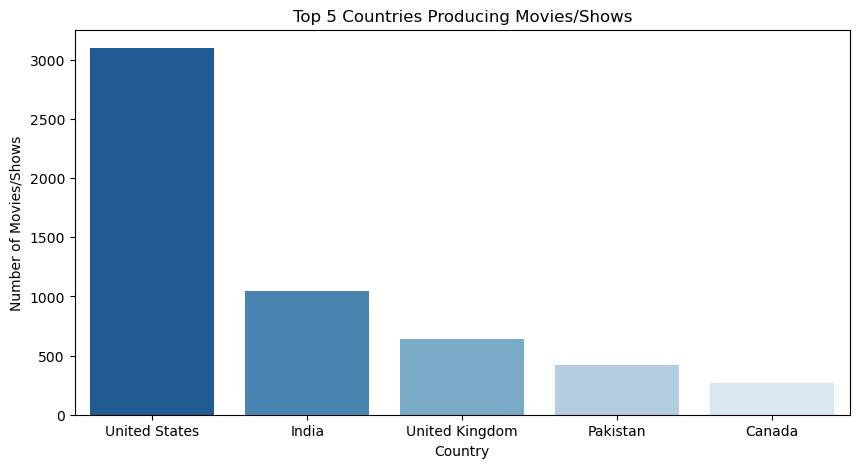

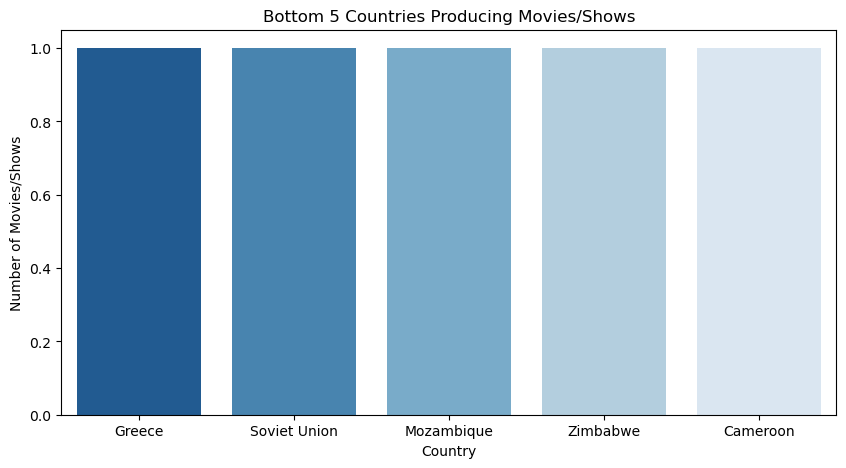

In [ ]:
# Exclude "Not Given" from the top countries
top_5_countries = country_counts[country_counts.index != "Not Given"].head(5)

# Plot Top 5 Countries
plt.figure(figsize=(10, 5))
sns.barplot(x=top_5_countries.index, y=top_5_countries.values, palette="Blues_r")
plt.xlabel("Country")
plt.ylabel("Number of Movies/Shows")
plt.title("Top 5 Countries Producing Movies/Shows")
plt.show()

# Plot Bottom 5 Countries
plt.figure(figsize=(10, 5))
sns.barplot(x=bottom_5_countries.index, y=bottom_5_countries.values, palette="Blues_r")
plt.xlabel("Country")
plt.ylabel("Number of Movies/Shows")
plt.title("Bottom 5 Countries Producing Movies/Shows")
plt.show()


# Movie Trends Over the Years

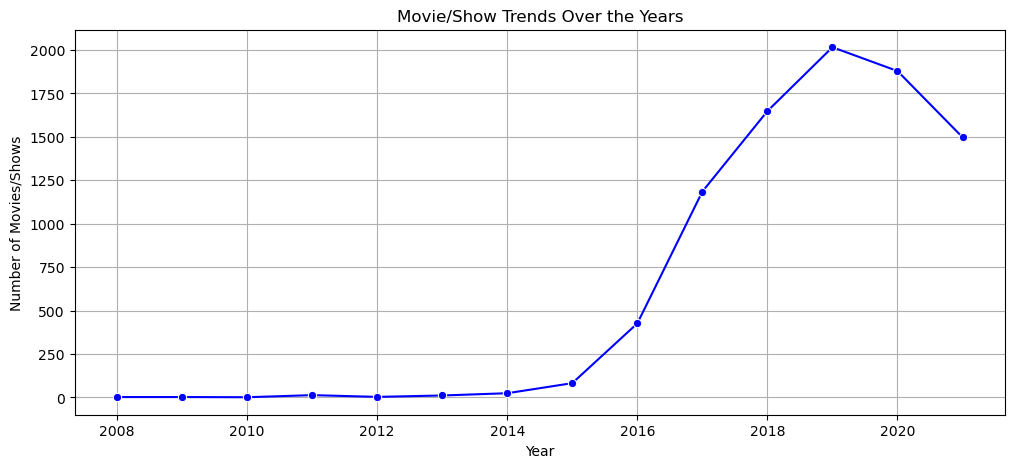

In [ ]:
# Showing movie trends over the years by grouping by year and count of movies/shows
yearly_trend = df.groupby("year_added")["show_id"].count()

# Plot movie trends over the years
plt.figure(figsize=(12, 5))
sns.lineplot(x=yearly_trend.index, y=yearly_trend.values, marker="o", color="b")
plt.xlabel("Year")
plt.ylabel("Number of Movies/Shows")
plt.title("Movie/Show Trends Over the Years")
plt.grid(True)
plt.show()


# Most Popular Country-Genre Mix

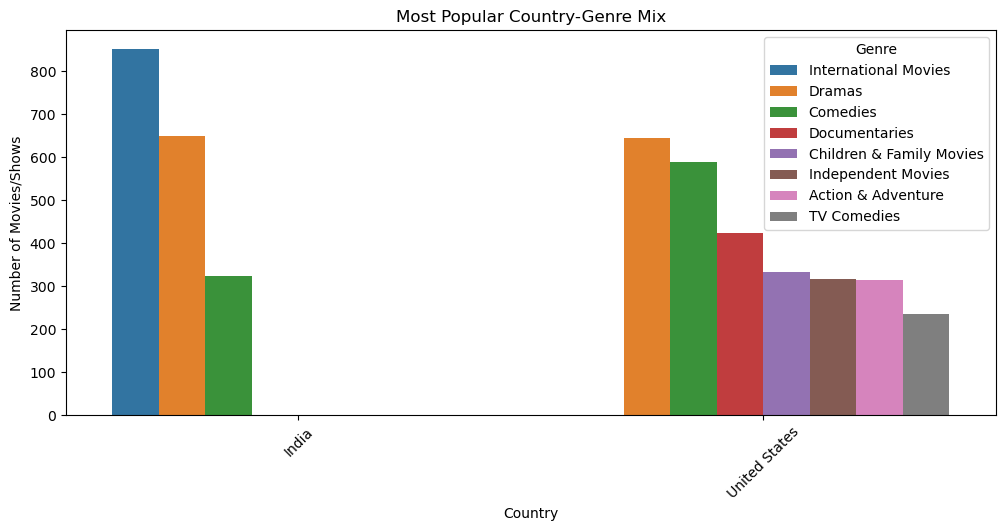

In [ ]:
# Expanding the 'listed_in' column (splitting by ', ') since some entries have multiple genre

df_exploded = df.assign(listed_in = df['listed_in'].str.split(', ')).explode('listed_in')

# Group by country and genre, count occurrences
country_genre_counts = df_exploded.groupby(["Country", "listed_in"])["show_id"].count().reset_index()

# Get the top 10 most common country-genre combinations
top_country_genre = country_genre_counts.sort_values(by="show_id", ascending=False).head(10)

# Plot the result
plt.figure(figsize=(12, 5))
sns.barplot(data=top_country_genre, x="Country", y="show_id", hue="listed_in")
plt.xlabel("Country")
plt.ylabel("Number of Movies/Shows")
plt.title("Most Popular Country-Genre Mix")
plt.xticks(rotation=45)
plt.legend(title="Genre", bbox_to_anchor=(1, 1))
plt.show()


# Most Popular Movie Genre

[('International Movies', 2752), ('Dramas', 2426), ('Comedies', 1674), ('International TV Shows', 1348), ('Documentaries', 868), ('Action & Adventure', 859), ('TV Dramas', 761), ('Independent Movies', 756), ('Children & Family Movies', 641), ('Romantic Movies', 616)]


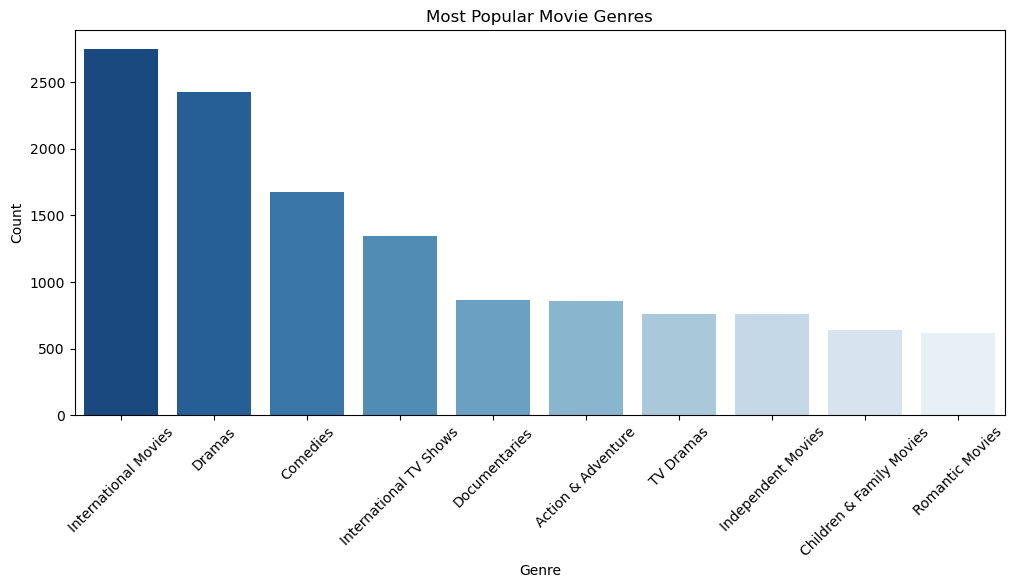

In [ ]:
# Splitting the 'listed_in' column and collecting all genres
all_genres = []
df["listed_in"].dropna().apply(lambda x: all_genres.extend(str(x).split(", ")))  # Convert to string before split

# Counting most popular genres
genre_counts = Counter(all_genres)

# Display top 10 genres
print(genre_counts.most_common(10))

# Creating a bar chart
plt.figure(figsize=(12, 5))
sns.barplot(x=[g[0] for g in genre_counts.most_common(10)], y=[g[1] for g in genre_counts.most_common(10)], palette="Blues_r")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.title("Most Popular Movie Genres")
plt.xticks(rotation=45)
plt.show()

# Countries with the Highest Average Movie Duration

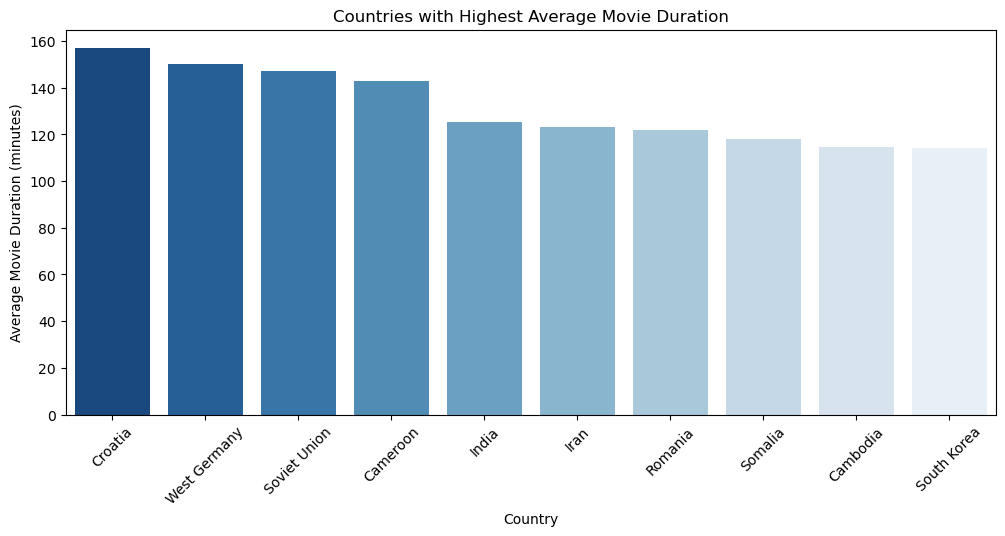

In [ ]:
# Ensure all values in "duration" are strings, except for existing numbers
df["duration"] = df["duration"].astype(str)

# Extracting all numbers from text where applicable and keep original numeric values in new column
df["movie_duration"] = df["duration"].apply(lambda x:
    float(x) if isinstance(x, (int, float))  # If it's already a number, keep it (entries that are just numbers)
    else float(x) if isinstance(x, str) and x.replace(".", "", 1).isdigit()  # If it's a numeric string
    else pd.to_numeric(str(x).split()[0], errors='coerce')  # Extract number from text and convert
)

# Filter out TV Shows
movies_df = df[df["Type"] == "Movie"].copy()

# Drop NaN values in movie_duration
movies_df = movies_df.dropna(subset=["movie_duration"])

# Group by country and compute the average movie duration
avg_duration = movies_df.groupby("Country")["movie_duration"].mean().reset_index()

# Sort in descending order and get the top 10 countries
top_countries_duration = avg_duration.sort_values(by="movie_duration", ascending=False).head(10)

# Plot the result
plt.figure(figsize=(12, 5))
sns.barplot(data=top_countries_duration, x="Country", y="movie_duration", palette="Blues_r")
plt.xlabel("Country")
plt.ylabel("Average Movie Duration (minutes)")
plt.title("Countries with Highest Average Movie Duration")
plt.xticks(rotation=45)
plt.show()


# Generating Random Ratings

In [ ]:
# Generating random ratings
df["random_rating"] = np.round(np.random.uniform(1.0, 10.0, df.shape[0]), 2)

# Checking results
df[["title", "random_rating"]].head(10)


,title,random_rating
0,Dick Johnson Is Dead,7.63
1,Ganglands,6.08
2,Midnight Mass,6.16
3,Confessions Of An Invisible Girl,5.39
4,Sankofa,7.03
5,The Great British Baking Show,1.54
6,The Starling,7.94
7,Motu Patlu In The Game Of Zones,8.05
8,Je Suis Karl,2.20
9,Motu Patlu In Wonderland,4.13


In [ ]:
df.head()

,show_id,Type,title,director,Country,date added,rating,duration,listed_in,year_added,year_month_added,days_since_release,TV_Show_duration,movie_duration,random_rating
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,PG-13,90 min,Documentaries,2021,2021-09,1238,NIL,90.0,7.63
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,TV-MA,NIL,"Crime TV Shows, International TV Shows, TV Act...",2021,2021-09,1239,1 Season,NaN,6.08
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,TV-MA,NIL,"TV Dramas, TV Horror, TV Mysteries",2021,2021-09,1239,1 Season,NaN,6.16
3,s14,Movie,Confessions Of An Invisible Girl,Bruno Garotti,Brazil,2021-09-22,TV-PG,91 min,"Children & Family Movies, Comedies",2021,2021-09,1241,NIL,91.0,5.39
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,TV-MA,125 min,"Dramas, Independent Movies, International Movies",2021,2021-09,1239,NIL,125.0,7.03


In [ ]:
df.isnull().sum()

show_id                  0
Type                     0
title                    0
director                 0
Country                  0
date added               0
rating                   0
duration                 0
listed_in                0
year_added               0
year_month_added         0
days_since_release       0
TV_Show_duration         0
movie_duration        2664
random_rating            0
dtype: int64

In [ ]:
df[["movie_duration"]] = df[["movie_duration"]].fillna("NIL")

In [ ]:
df.isnull().sum()

show_id               0
Type                  0
title                 0
director              0
Country               0
date added            0
rating                0
duration              0
listed_in             0
year_added            0
year_month_added      0
days_since_release    0
TV_Show_duration      0
movie_duration        0
random_rating         0
dtype: int64

In [ ]:
cleaned_file_path = "C:\\Users\\HP\\Downloads\\Halimat's_Project.xlsx"
df.to_excel(cleaned_file_path, index=False)